In [ ]:
# Simulate IoT Devices and Save Data
import random
import time
import pandas as pd

# Simulate IoT data
devices = [f"Device_{i}" for i in range(1, 6)]
data = []

for _ in range(10):  # small sample only for display
    for device in devices:
        temperature = round(random.uniform(20, 40), 2)
        humidity = round(random.uniform(30, 80), 2)
        timestamp = int(time.time())
        data.append([device, temperature, humidity, timestamp])
    time.sleep(0.1)

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Device", "Temperature", "Humidity", "Timestamp"])
df.head(15)


,Device,Temperature,Humidity,Timestamp
0,Device_1,37.52,38.75,1763387732
1,Device_2,34.90,77.21,1763387732
2,Device_3,32.71,34.65,1763387732
3,Device_4,32.91,76.33,1763387732
4,Device_5,33.88,32.21,1763387732
5,Device_1,21.70,56.95,1763387732
6,Device_2,32.05,66.75,1763387732
7,Device_3,21.81,56.63,1763387732
8,Device_4,34.84,42.09,1763387732
9,Device_5,33.45,52.52,1763387732


In [ ]:
# load the dataset
import pandas as pd

# Load the CSV file
df = pd.read_csv("iot_dataset.csv")
print(df.head())

     Device  Temperature  Humidity   Timestamp
0  Device_1        36.34     47.45  1763387498
1  Device_2        28.79     52.97  1763387498
2  Device_3        36.40     31.74  1763387498
3  Device_4        26.02     61.77  1763387498
4  Device_5        39.42     43.57  1763387498


In [36]:
import pandas as pd

# Average Temperature of all devices
avg_temp = df['Temperature'].mean()
print("Average Temperature of all devices:")
pd.DataFrame([["Average Temperature (°C)", round(avg_temp, 2)]], columns=["Metric", "Value"])

# Highest Humidity recorded
max_humidity = df['Humidity'].max()
print("\nHighest Humidity recorded:")
pd.DataFrame([["Highest Humidity (%)", round(max_humidity, 2)]], columns=["Metric", "Value"])

# Detect devices with abnormal temperature (e.g., > 35°C)
abnormal_temp = df[df['Temperature'] > 35]
print("\nDevices with Abnormal Temperature (>35°C):")
display(abnormal_temp[['Device', 'Temperature', 'Timestamp']])

# Detect devices with abnormal humidity (e.g., < 40% or > 70%)
abnormal_humidity = df[(df['Humidity'] < 40) | (df['Humidity'] > 70)]
print("\nDevices with Abnormal Humidity (<40% or >70%):")
display(abnormal_humidity[['Device', 'Humidity', 'Timestamp']])


Average Temperature of all devices:

Highest Humidity recorded:

Devices with Abnormal Temperature (>35°C):


,Device,Temperature,Timestamp
0,Device_1,35.27,1763387643
5,Device_1,37.46,1763387643
9,Device_5,37.10,1763387643
13,Device_4,35.23,1763387643
14,Device_5,35.92,1763387643
...,...,...,...
981,Device_2,38.70,1763387646
984,Device_5,36.15,1763387646
986,Device_2,36.86,1763387646
989,Device_5,37.46,1763387646



Devices with Abnormal Humidity (<40% or >70%):


,Device,Humidity,Timestamp
0,Device_1,38.87,1763387643
6,Device_2,34.46,1763387643
7,Device_3,31.73,1763387643
9,Device_5,71.13,1763387643
11,Device_2,77.60,1763387643
...,...,...,...
987,Device_3,70.49,1763387646
989,Device_5,74.72,1763387646
990,Device_1,32.61,1763387646
993,Device_4,79.25,1763387646


In [ ]:
# Visualization
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
df = pd.read_csv("iot_dataset.csv")


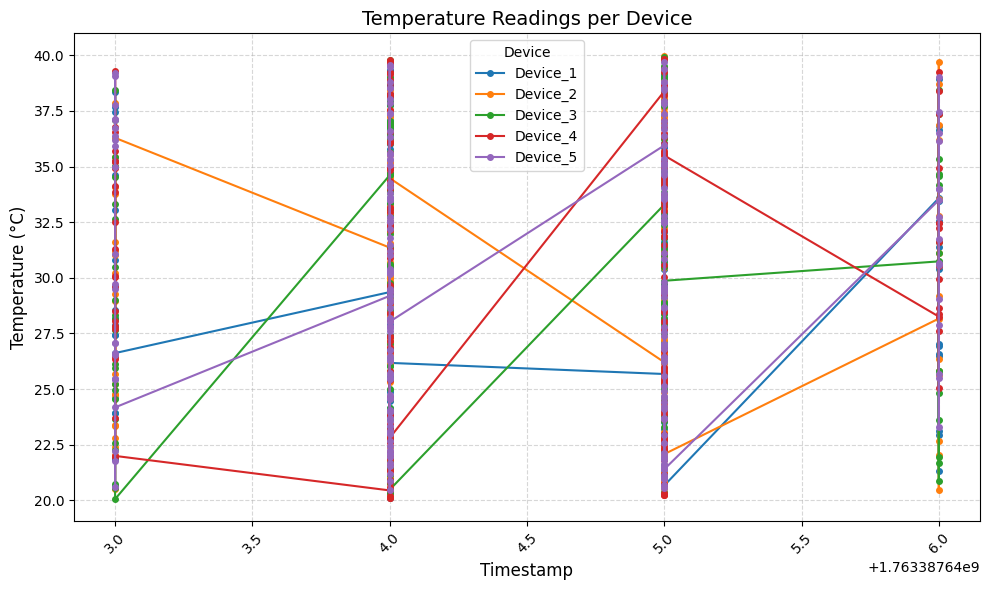

In [34]:
plt.figure(figsize=(10,6))

for device in df['Device'].unique():
    device_data = df[df['Device'] == device]
    plt.plot(device_data['Timestamp'], device_data['Temperature'], marker='o', markersize=4, label=device)

plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.title("Temperature Readings per Device", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Device")
plt.tight_layout()
plt.show()


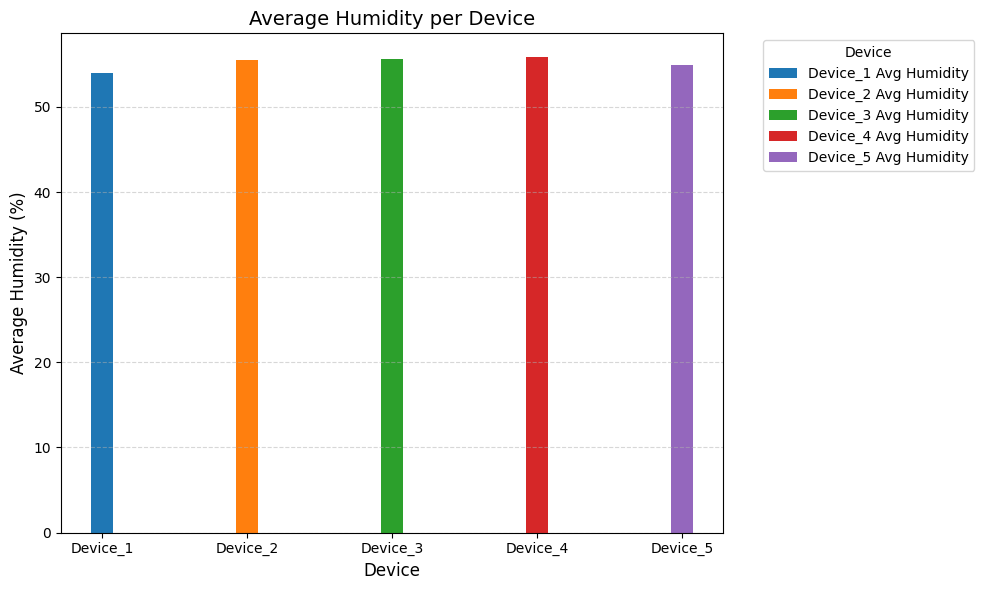

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

devices = df['Device'].unique()
x = np.arange(len(devices))
width = 0.15

# Plot average humidity per device as grouped bars
for i, device in enumerate(devices):
    device_data = df[df['Device'] == device]
    plt.bar(x[i], device_data['Humidity'].mean(), width=width, label=f"{device} Avg Humidity", color=plt.cm.tab10(i))

plt.xlabel("Device", fontsize=12)
plt.ylabel("Average Humidity (%)", fontsize=12)
plt.title("Average Humidity per Device", fontsize=14)
plt.xticks(x, devices)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Device", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


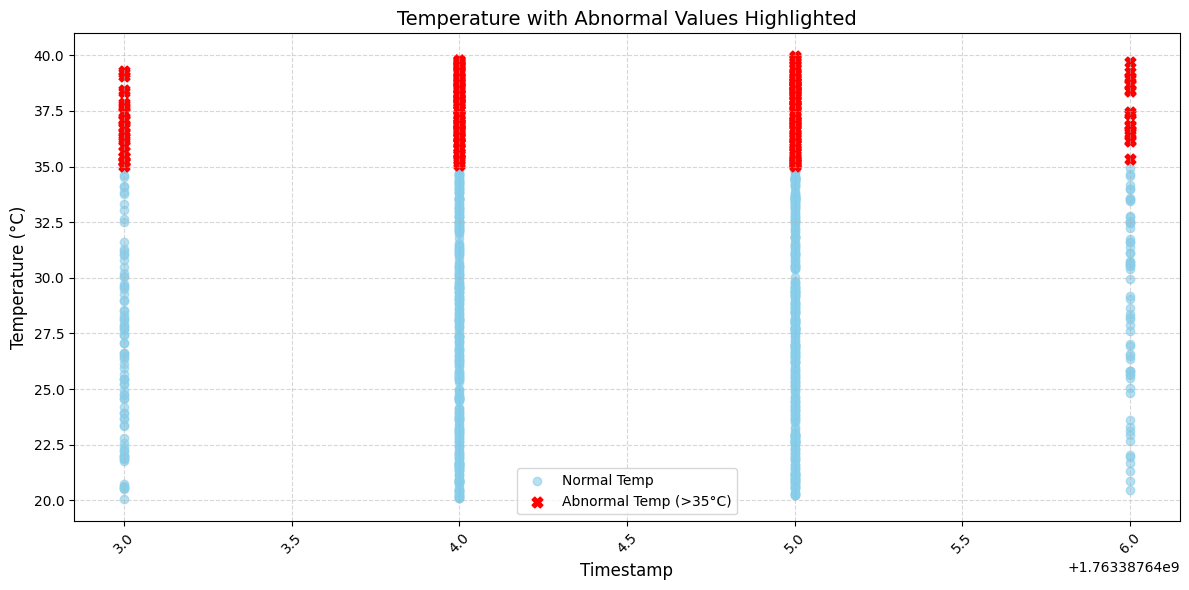

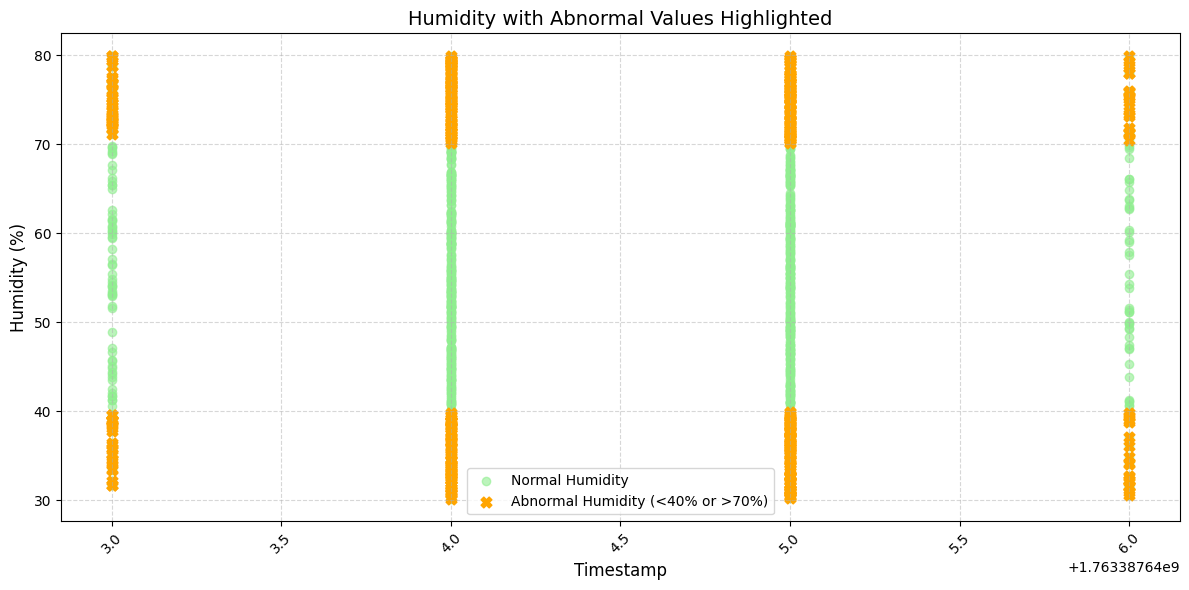

In [ ]:
abnormal_temp = df[df['Temperature'] > 35]
abnormal_humidity = df[(df['Humidity'] < 40) | (df['Humidity'] > 70)]

plt.figure(figsize=(12,6))

# Plot normal temperature
plt.scatter(df['Timestamp'], df['Temperature'], color='skyblue', label='Normal Temp', alpha=0.6)
# Plot abnormal temperature
plt.scatter(abnormal_temp['Timestamp'], abnormal_temp['Temperature'], color='red', label='Abnormal Temp (>35°C)', s=60, marker='X')

plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.title("Temperature with Abnormal Values Highlighted", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Similar for Humidity
plt.figure(figsize=(12,6))
plt.scatter(df['Timestamp'], df['Humidity'], color='lightgreen', label='Normal Humidity', alpha=0.6)
plt.scatter(abnormal_humidity['Timestamp'], abnormal_humidity['Humidity'], color='orange', label='Abnormal Humidity (<40% or >70%)', s=60, marker='X')

plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.title("Humidity with Abnormal Values Highlighted", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
